<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

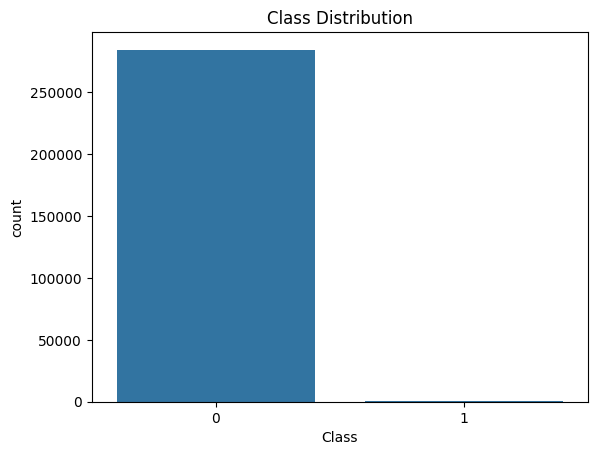

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import time

# Загрузка данных
df = pd.read_csv("creditcard.csv")

# Предварительный анализ
df.info()
print(df.describe())
print(df.isnull().sum())

# Балансировка классов
print("Class distribution:")
print(df['Class'].value_counts())

# Визуализация распределения классов
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()


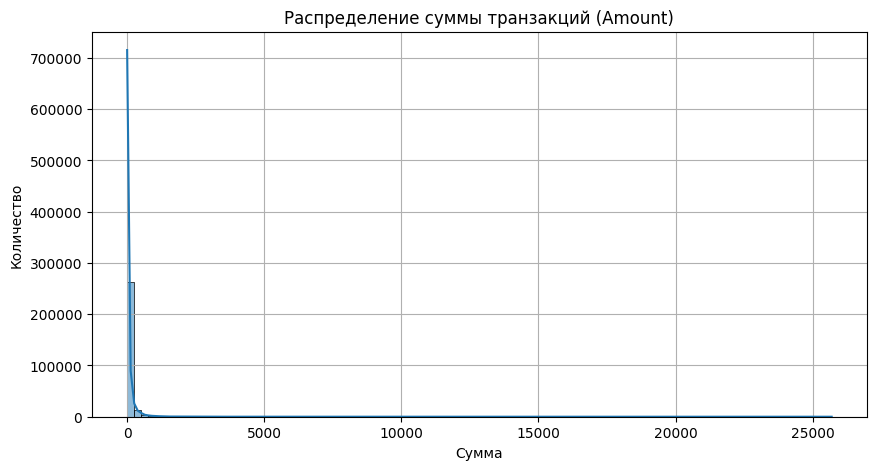

In [6]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Amount'], bins=100, kde=True)
plt.title('Распределение суммы транзакций (Amount)')
plt.xlabel('Сумма')
plt.ylabel('Количество')
plt.grid(True)
plt.show()


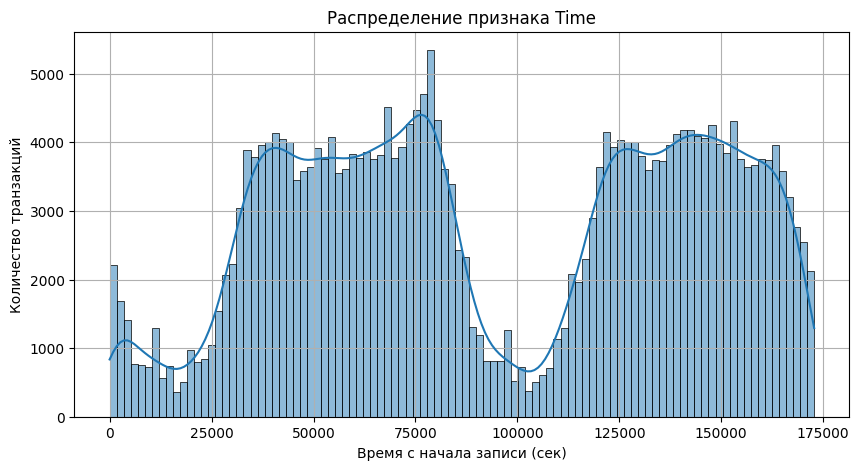

In [7]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Time'], bins=100, kde=True)
plt.title('Распределение признака Time')
plt.xlabel('Время с начала записи (сек)')
plt.ylabel('Количество транзакций')
plt.grid(True)
plt.show()


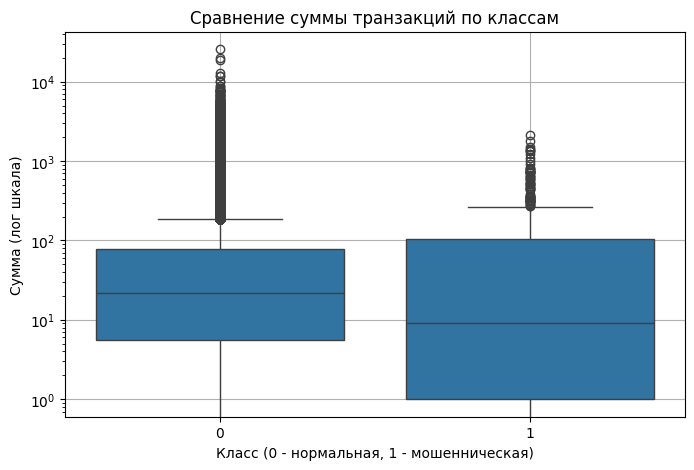

In [8]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Class', y='Amount', data=df)
plt.yscale('log')  # логарифмическая шкала для удобства восприятия
plt.title('Сравнение суммы транзакций по классам')
plt.xlabel('Класс (0 - нормальная, 1 - мошенническая)')
plt.ylabel('Сумма (лог шкала)')
plt.grid(True)
plt.show()


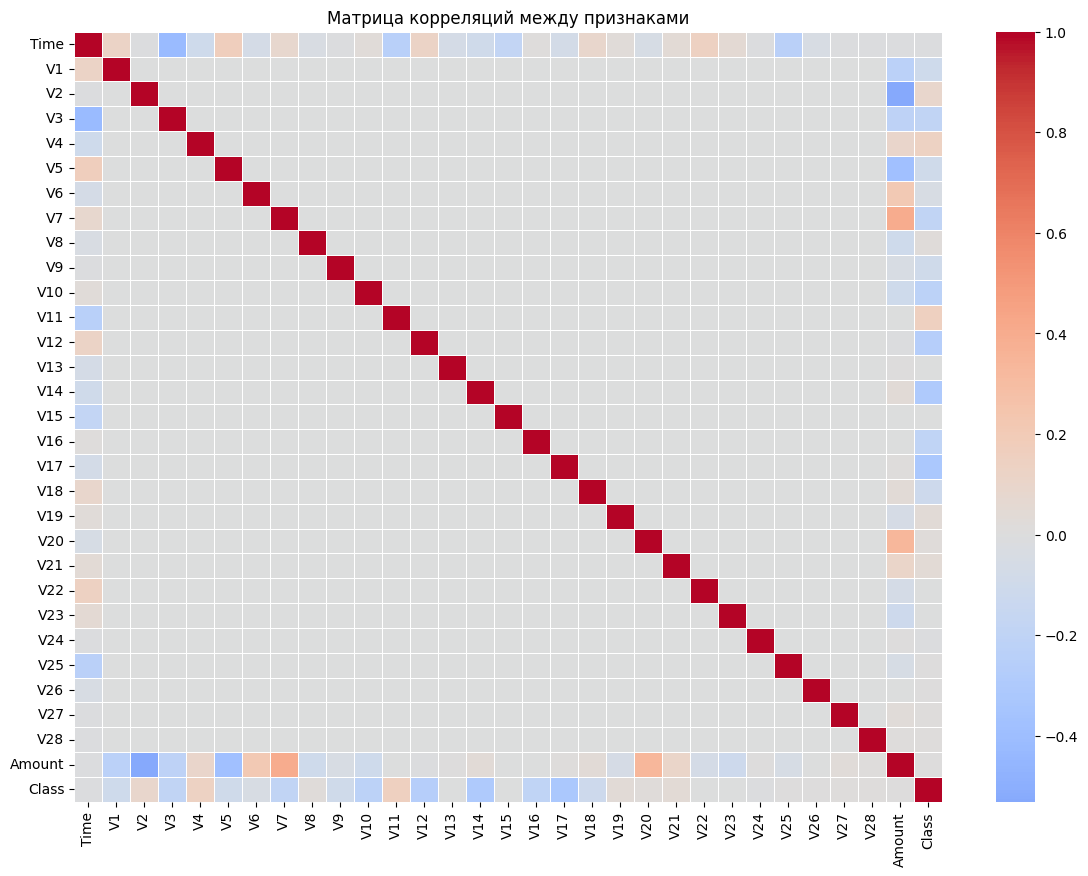

In [9]:
plt.figure(figsize=(14, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Матрица корреляций между признаками')
plt.show()


In [14]:
# Масштабирование признака 'Amount'
df['normAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df.drop(['Amount', 'Time'], axis=1, inplace=True)

# Разделение на признаки и целевую переменную
X = df.drop('Class', axis=1)
y = df['Class']


Разделение на обучающую и тестовую выборки

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

Метод для обучения и сбора метрик модели

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import time

results = {}

def evaluate_model(model, X_train = X_train, X_test=X_test, y_train=y_train, y_test=y_test, model_name="Model"):
    start = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\nModel: {model_name}")
    print("Время обучения:", round(train_time, 2), "секунд")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else 'N/A'
    print("ROC AUC Score:", auc) #round(roc_auc_score(y_test, y_proba), 4))

    # # ROC кривая
    # fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    # plt.plot(fpr, tpr, label=f'{model_name} (AUC={roc_auc_score(y_test, y_proba):.2f})')

    results[model_name] = {
        'model': model,
        'auc': auc,
        'train_time': train_time
    }

In [45]:
evaluate_model(LogisticRegression(max_iter=1000),model_name = 'Logistic Regression')


Model: Logistic Regression
Время обучения: 0.2 секунд
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.61      0.72       148

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix:
 [[85280    15]
 [   57    91]]
ROC AUC Score: 0.9564924118678735


In [47]:
evaluate_model(RandomForestClassifier(),model_name = 'Random Forest')


Model: Random Forest
Время обучения: 154.27 секунд
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.75      0.84       148

    accuracy                           1.00     85443
   macro avg       0.98      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix:
 [[85290     5]
 [   37   111]]
ROC AUC Score: 0.9341513475489676


In [48]:
evaluate_model( KNeighborsClassifier(),model_name = 'KNN')


Model: KNN
Время обучения: 0.05 секунд
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.91      0.74      0.81       148

    accuracy                           1.00     85443
   macro avg       0.95      0.87      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix:
 [[85284    11]
 [   39   109]]
ROC AUC Score: 0.9187812409396323


In [49]:
evaluate_model(SVC(probability=True),model_name = 'SVM')

KeyboardInterrupt: 

In [50]:
evaluate_model( GaussianNB(),model_name = 'Naive Bayes')


Model: Naive Bayes
Время обучения: 0.08 секунд
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.80      0.11       148

    accuracy                           0.98     85443
   macro avg       0.53      0.89      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Confusion Matrix:
 [[83438  1857]
 [   29   119]]
ROC AUC Score: 0.9554329330796298


In [58]:
evaluate_model(  GradientBoostingClassifier(),model_name = 'Gradient Boosting')


Model: Gradient Boosting
Время обучения: 325.92 секунд
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.73      0.16      0.27       148

    accuracy                           1.00     85443
   macro avg       0.86      0.58      0.63     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix:
 [[85286     9]
 [  124    24]]
ROC AUC Score: 0.34459051495366644


Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\Users\xellis\AppData\Local\Programs\Python\Python312\Lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\xellis\AppData\Local\Programs\Python\Python312\Lib\asyncio\selector_events.py", line 132, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] Удаленный хост принудительно разорвал существующее подключение
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\Users\xellis\AppData\Local\Programs\Python\Python312\Lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\xellis\AppData\Local\Programs\Python\Python312\Lib\asyncio\selector

In [51]:
evaluate_model( XGBClassifier(eval_metric='logloss'),model_name = 'XGBoost')


Model: XGBoost
Время обучения: 0.55 секунд
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.93      0.73      0.82       148

    accuracy                           1.00     85443
   macro avg       0.97      0.86      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix:
 [[85287     8]
 [   40   108]]
ROC AUC Score: 0.9333504704657762


In [52]:
evaluate_model( LGBMClassifier(),model_name = 'LightGBM')

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001725 -> initscore=-6.360519
[LightGBM] [Info] Start training from score -6.360519

Model: LightGBM
Время обучения: 0.53 секунд
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.15      0.21      0.18       148

    accuracy                           1.00     85443
   macro avg       0.57      0.60      0.59     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix:
 [[85120   175]
 [  117    31]]
ROC AUC Score: 0.5286335341731321


{'Logistic Regression': {'model': LogisticRegression(max_iter=1000), 'auc': np.float64(0.9564924118678735), 'train_time': 0.19907855987548828}, 'Random Forest': {'model': RandomForestClassifier(), 'auc': np.float64(0.9341513475489676), 'train_time': 154.27195858955383}, 'KNN': {'model': KNeighborsClassifier(), 'auc': np.float64(0.9187812409396323), 'train_time': 0.0502316951751709}, 'Naive Bayes': {'model': GaussianNB(), 'auc': np.float64(0.9554329330796298), 'train_time': 0.08115911483764648}, 'XGBoost': {'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              ma

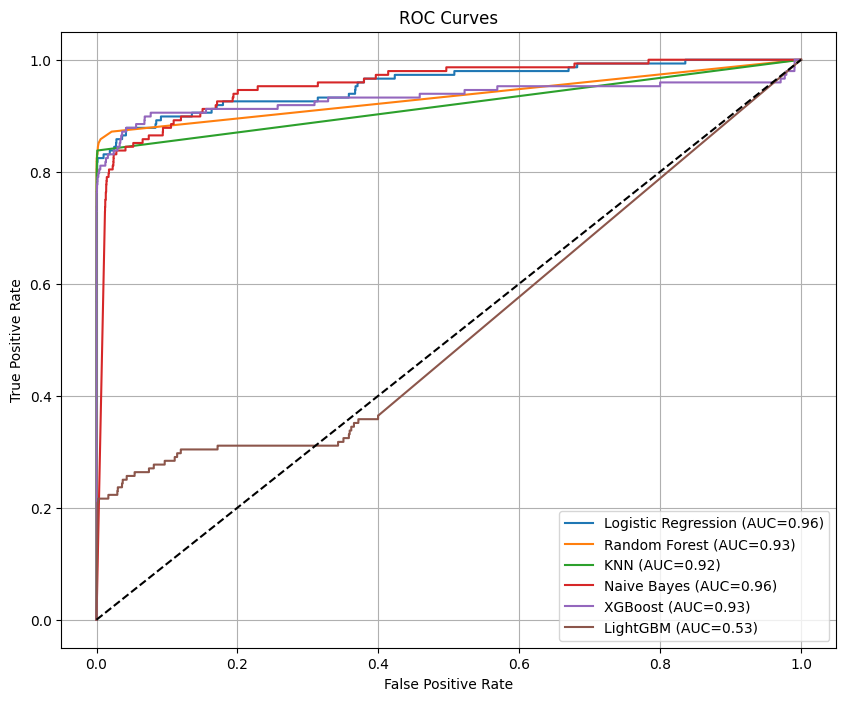

In [53]:
# Визуализация ROC-кривых
print(results)
plt.figure(figsize=(10,8))
for name, res in results.items():
    model = res['model']
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f"{name} (AUC={res['auc']:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

Изменение и поиск оптимальных гиперпараметров для XGBClassifier

In [54]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
import time

In [ ]:
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'scale_pos_weight': [1, 5, 10, 20]
}

In [56]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,
    scoring='roc_auc',
    cv=cv,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

start = time.time()
search.fit(X_train, y_train)
end = time.time()

print(f"\nВремя подбора гиперпараметров: {end - start:.2f} сек")


Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\xellis\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:35:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Время подбора гиперпараметров: 57.58 сек


In [57]:
best_model = search.best_estimator_

# Предсказание
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Метрики
print("Лучшие параметры:", search.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"\nROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")


Лучшие параметры: {'subsample': 0.6, 'scale_pos_weight': 1, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 5, 'colsample_bytree': 0.8}

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.87      0.72      0.79       148

    accuracy                           1.00     85443
   macro avg       0.93      0.86      0.89     85443
weighted avg       1.00      1.00      1.00     85443


Confusion Matrix:
 [[85279    16]
 [   42   106]]

ROC AUC Score: 0.9669
